# Single-cell RNA-seq imputation using DeepImpute

Here is a comprehensive tutorial to understand the functionnalities of DeepImpute.

In [1]:
from deepimpute.multinet import MultiNet
import pandas as pd

# Load dataset using pandas
data = pd.read_csv('examples/test.csv',index_col=0)
print('Working on {} cells and {} genes'.format(*data.shape))

Working on 500 cells and 3000 genes


## Create a DeepImpute multinet

In [2]:
# Using default parameters
multinet = MultiNet() 

In [13]:
# Using custom parameters
NN_params = {'max_epochs': 200,
            'learning_rate': 1e-4,
            'dims': [20,600], # 500 output neurons, 20 highest correlated genes for each output gene
            'batch_size': 64,
            'layers': [{'label': 'dense', 'activation': 'relu', 'nb_neurons': 150},
                       {'label': 'dropout', 'activation': 'dropout', 'rate': 0.15},
                       {'label': 'dense', 'activation': 'relu'}], # Output neurons for layer 3: dims[1]
            'n_cores': 8
            }

multinet = MultiNet(**NN_params)

## Fit the networks

In [12]:
# Using all the data
multinet.fit(data,cell_subset=1)

Gene prediction limit set to 2085 genes
Using 1040 genes as potential predictors
Starting training with 500 cells (100.0%) on 4 threads (3 cores/thread).
Training model (500 samples) on 3 cores.
Training model (500 samples) on 3 cores.
Training model (500 samples) on 3 cores.
Training model (500 samples) on 3 cores.
Input layer: 549
Input layer: 536
Input layer: 540
Layer-0 label: dense, activation: relu, nb_neurons: 150
Input layer: 548
Layer-0 label: dense, activation: relu, nb_neurons: 150
Layer-0 label: dense, activation: relu, nb_neurons: 150
Layer-1 label: dropout, activation: dropout, rate: 0.15
Layer-0 label: dense, activation: relu, nb_neurons: 150
Layer-2 label: dense, activation: relu, nb_neurons: 285
Layer-1 label: dropout, activation: dropout, rate: 0.15
Layer-2 label: dense, activation: relu, nb_neurons: 600
Layer-1 label: dropout, activation: dropout, rate: 0.15
Layer-2 label: dense, activation: relu, nb_neurons: 600
Layer-1 label: dropout, activation: dropout, rate: 0.1

Process ForkPoolWorker-25:
Traceback (most recent call last):
  File "/home/carisdak/anaconda3/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
Process ForkPoolWorker-24:
Process ForkPoolWorker-26:
Process ForkPoolWorker-23:
  File "/home/carisdak/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File "/home/carisdak/anaconda3/lib/python3.6/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))
Traceback (most recent call last):
  File "/home/carisdak/anaconda3/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/home/carisdak/anaconda3/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/home/carisdak/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/carisdak/anaconda3

KeyboardInterrupt: 

In [14]:
# Using 80% of the data
multinet.fit(data,cell_subset=0.8)

Gene prediction limit set to 2085 genes
Using 1040 genes as potential predictors
Starting training with 400 cells (80.0%) on 4 threads (2 cores/thread).
Training model (400 samples) on 2 cores.
Training model (400 samples) on 2 cores.
Training model (400 samples) on 2 cores.
Training model (400 samples) on 2 cores.
Input layer: 540
Input layer: 536
Input layer: 549
Layer-0 label: dense, activation: relu, nb_neurons: 150
Input layer: 548
Layer-0 label: dense, activation: relu, nb_neurons: 150
Layer-0 label: dense, activation: relu, nb_neurons: 150
Layer-0 label: dense, activation: relu, nb_neurons: 150
Layer-1 label: dropout, activation: dropout, rate: 0.15
Layer-1 label: dropout, activation: dropout, rate: 0.15
Layer-2 label: dense, activation: relu, nb_neurons: 285
Layer-1 label: dropout, activation: dropout, rate: 0.15
Layer-1 label: dropout, activation: dropout, rate: 0.15
Layer-2 label: dense, activation: relu, nb_neurons: 600
Layer-2 label: dense, activation: relu, nb_neurons: 600

In [16]:
# Using 200 cells (randomly selected)
multinet.fit(data,cell_subset=200)

Gene prediction limit set to 2085 genes
Using 1040 genes as potential predictors
Starting training with 200 cells (40.0%) on 4 threads (2 cores/thread).
Training model (200 samples) on 2 cores.
Training model (200 samples) on 2 cores.
Training model (200 samples) on 2 cores.
Training model (200 samples) on 2 cores.
Input layer: 548
Input layer: 540
Input layer: 549
Input layer: 536
Layer-0 label: dense, activation: relu, nb_neurons: 150
Layer-0 label: dense, activation: relu, nb_neurons: 150
Layer-0 label: dense, activation: relu, nb_neurons: 150
Layer-0 label: dense, activation: relu, nb_neurons: 150
Layer-1 label: dropout, activation: dropout, rate: 0.15
Layer-1 label: dropout, activation: dropout, rate: 0.15
Layer-1 label: dropout, activation: dropout, rate: 0.15
Layer-2 label: dense, activation: relu, nb_neurons: 600
Layer-2 label: dense, activation: relu, nb_neurons: 600
Layer-2 label: dense, activation: relu, nb_neurons: 285
Layer-1 label: dropout, activation: dropout, rate: 0.15

In [18]:
# Custom fit
trainingData = data.iloc[100:250,:]
multinet.fit(trainingData)

Gene prediction limit set to 1940 genes
Using 925 genes as potential predictors
Starting training with 150 cells (100.0%) on 4 threads (2 cores/thread).
Training model (150 samples) on 2 cores.
Training model (150 samples) on 2 cores.
Training model (150 samples) on 2 cores.
Training model (150 samples) on 2 cores.
Input layer: 792
Input layer: 652
Input layer: 648
Input layer: 627
Layer-0 label: dense, activation: relu, nb_neurons: 150
Layer-0 label: dense, activation: relu, nb_neurons: 150
Layer-0 label: dense, activation: relu, nb_neurons: 150
Layer-0 label: dense, activation: relu, nb_neurons: 150
Layer-1 label: dropout, activation: dropout, rate: 0.15
Layer-1 label: dropout, activation: dropout, rate: 0.15
Layer-2 label: dense, activation: relu, nb_neurons: 140
Layer-1 label: dropout, activation: dropout, rate: 0.15
Layer-1 label: dropout, activation: dropout, rate: 0.15
Layer-2 label: dense, activation: relu, nb_neurons: 600
Layer-2 label: dense, activation: relu, nb_neurons: 600

## Imputation

The imputation can be done on any dataset as long as the gene labels are the same

In [19]:
imputedData = multinet.predict(data)

INFO:tensorflow:Restoring parameters from /tmp/run/c30ac48385/lr=0.0001_bs=64_dims=20-600_nodes=150_dp=0.15_b'ee9d5c'/Checkpoint-91
INFO:tensorflow:Restoring parameters from /tmp/run/c30ac48385/lr=0.0001_bs=64_dims=20-600_nodes=150_dp=0.15_b'5d29dc'/Checkpoint-102
INFO:tensorflow:Restoring parameters from /tmp/run/c30ac48385/lr=0.0001_bs=64_dims=20-600_nodes=150_dp=0.15_b'fab194'/Checkpoint-91
INFO:tensorflow:Restoring parameters from /tmp/run/d24cfcbcc1/lr=0.0001_bs=64_dims=20-600_nodes=150_dp=0.15_b'd4f227'/Checkpoint-118
INFO:tensorflow:Restoring parameters from /tmp/run/d24cfcbcc1/lr=0.0001_bs=64_dims=20-600_nodes=150_dp=0.15_b'f3394e'/Checkpoint-101
INFO:tensorflow:Restoring parameters from /tmp/run/c30ac48385/lr=0.0001_bs=64_dims=20-600_nodes=150_dp=0.15_b'ba937c'/Checkpoint-91
INFO:tensorflow:Restoring parameters from /tmp/run/d24cfcbcc1/lr=0.0001_bs=64_dims=20-600_nodes=150_dp=0.15_b'bca0fd'/Checkpoint-160
INFO:tensorflow:Restoring parameters from /tmp/run/d24cfcbcc1/lr=0.0001_

InvalidIndexError: 

## Visualization

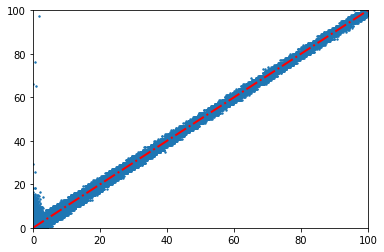

In [8]:
import matplotlib.pyplot as plt
import numpy as np

limits = [0,100]

fig,ax = plt.subplots()

jitter = np.random.normal(0,1,data.size) # Add some jittering to better see the point density
ax.scatter(data.values.flatten()+jitter,imputedData.values.flatten(),s=2)
ax.plot(limits,limits,'r-.',linewidth=2)
ax.set_xlim(limits)
ax.set_ylim(limits)

plt.show()


## Scoring

In [7]:
multinet.score(data)

INFO:tensorflow:Restoring parameters from /tmp/run/c3d60ace8e/lr=0.0005_bs=64_dims=20-500_nodes=300_dp=0.5_b'9ccfbc'/Checkpoint-32
INFO:tensorflow:Restoring parameters from /tmp/run/c3d60ace8e/lr=0.0005_bs=64_dims=20-500_nodes=300_dp=0.5_b'4a71fd'/Checkpoint-52
INFO:tensorflow:Restoring parameters from /tmp/run/c3d60ace8e/lr=0.0005_bs=64_dims=20-500_nodes=300_dp=0.5_b'b7dd78'/Checkpoint-49
INFO:tensorflow:Restoring parameters from /tmp/run/c3d60ace8e/lr=0.0005_bs=64_dims=20-500_nodes=300_dp=0.5_b'50fbf6'/Checkpoint-32
INFO:tensorflow:Restoring parameters from /tmp/run/c3d60ace8e/lr=0.0005_bs=64_dims=20-500_nodes=300_dp=0.5_b'fe8a5f'/Checkpoint-45


0.36328986761217963